In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data/updated_combined.csv')
df = df.dropna()

In [20]:
sentences = df['text'].tolist()
sentences

['@<oov> wood   knp lo gak berani bersumpah dan bertaruh  krnlo pecundang  lo mau lempar batu sembunyi tangan  akun lo aja bodong  lo ngaca  nggak punya kaca  biar lo lihat seberapa pengecutnya lo',
 ' <oov> tolol   gak ada hubungan nya keguguran dgn pake hijab syar i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy   otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar ',
 'geblek lo tata   cowo bgt dibela in balikan   hadeww   ntar ditinggal lg nyalahin tuh cowo   padahal kitenya yg oon ',
 'haha  somad somad  muka dekil otak  %   kok ya g malu ngaku ustad    ',
 'hahaha  kaum sableng     kl berita begini mrk buta tuli   ',
 'kmrn termewek  skr lengket lg duhhh kok labil bgt sih mbak kya abege ajah ato yg kmrn cari sensasi biar top markotoppp ertong gk berkualitas',
 'hahaha  makin stress aja  ni umat sableng  dlu raja salma jg d catut  dlm mslh rijik  eh skrg tmbh parah nyatut kepala negara tetangga  segitu parahnya pengikut lu mad   ',
 'intinya ka

Average length of sentences: 17.952060383516933
Maximum length of sentences: 142
Minimum length of sentences: 1


(array([3.320e+02, 1.481e+03, 1.874e+03, 1.858e+03, 1.696e+03, 1.102e+03,
        1.464e+03, 1.097e+03, 7.770e+02, 5.950e+02, 5.430e+02, 3.410e+02,
        5.350e+02, 4.650e+02, 2.710e+02, 1.440e+02, 4.900e+01, 2.400e+01,
        1.900e+01, 7.000e+00, 1.200e+01, 6.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   3.82,   6.64,   9.46,  12.28,  15.1 ,  17.92,  20.74,
         23.56,  26.38,  29.2 ,  32.02,  34.84,  37.66,  40.48,  43.3 ,
         46.12,  48.94,  51.76,  54.58,  57.4 ,  60.22,  63.04,  65.86,
         68.68,  71.5 ,  74.32,  77.14,  79.96,  82.78,  85.6 ,  88.42,
         91.24,  94.06,  96.88,  99.7 , 102.52, 105.34, 108.16, 110.98,
        113.8 , 

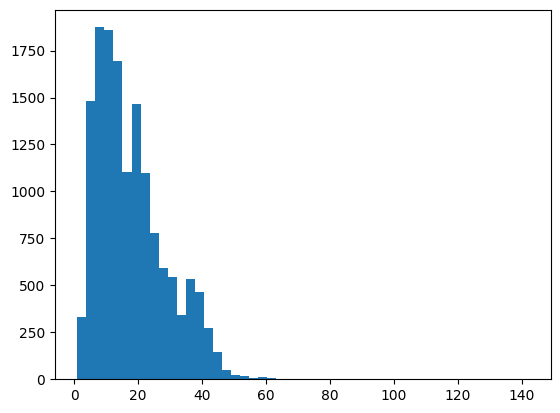

In [21]:
# finding the average length of the sentences
avg_len = sum([len(sentence.split()) for sentence in sentences]) / len(sentences)
max_len = max([len(sentence.split()) for sentence in sentences])
min_len = min([len(sentence.split()) for sentence in sentences])

print(f'Average length of sentences: {avg_len}')
print(f'Maximum length of sentences: {max_len}')
print(f'Minimum length of sentences: {min_len}')

# finding the distribution of the length of the sentences
plt.hist([len(sentence.split()) for sentence in sentences], bins=50)

In [22]:
# encoding
num_words = 10000
embedding_dim = 16
max_length = 36
truncate_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

# splitting the data
split = 0.8
split_index = int(split * len(padded))

training_sequences = padded[:split_index]
testing_sequences = padded[split_index:]

training_labels = df['sentiment'].tolist()[:split_index]
testing_labels = df['sentiment'].tolist()[split_index:]

In [23]:
# defining initial model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build()
model.fit(training_sequences, np.array(training_labels), epochs=15, validation_data=(testing_sequences, np.array(testing_labels)))

Epoch 1/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5782 - loss: 0.6727 - val_accuracy: 0.7080 - val_loss: 0.5919
Epoch 2/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7551 - loss: 0.5476 - val_accuracy: 0.8161 - val_loss: 0.4605
Epoch 3/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8510 - loss: 0.3943 - val_accuracy: 0.8185 - val_loss: 0.4102
Epoch 4/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8907 - loss: 0.3018 - val_accuracy: 0.8256 - val_loss: 0.3949
Epoch 5/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9049 - loss: 0.2545 - val_accuracy: 0.8069 - val_loss: 0.4261
Epoch 6/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9222 - loss: 0.2233 - val_accuracy: 0.8215 - val_loss: 0.4204
Epoch 7/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 0.2026 - val_accuracy: 0.8287 - val_loss: 0.4178
Epoch 8/15
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 0.1804 - val_accuracy: 0.

In [38]:
# return: (prediction, probability) (deket 0: not toxic, deket 1: toxic))
def infer(tokenizer, model, sentence, max_length, padding_type, truncate_type):
    sequences = tokenizer.texts_to_sequences([sentence])
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

    prob_num = model.predict(padded)[0][0] 
    if prob_num > 0.8 :
        return 'Toxic',prob_num
    else:
        return 'Not Toxic',prob_num

In [36]:
# trying to predict the sentiment of a sentence
eval_sentence = ['jelek banget mukanya']
eval_sequence = tokenizer.texts_to_sequences(eval_sentence)
eval_padded = pad_sequences(eval_sequence, maxlen=max_length, padding=padding_type, truncating=truncate_type)

model.predict(eval_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.9386542]], dtype=float32)

In [39]:
infer(tokenizer, model, 'jelek banget mukanya', max_length, padding_type, truncate_type)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


('Toxic', 0.9386542)

In [40]:
# save to h5
model.save('model_toxic_classification.h5')